### Scales and Transformations

### imports and data prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [5]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

### Scale the x-axis to log-type with comapre to original plot of normal histogram for weight column full data

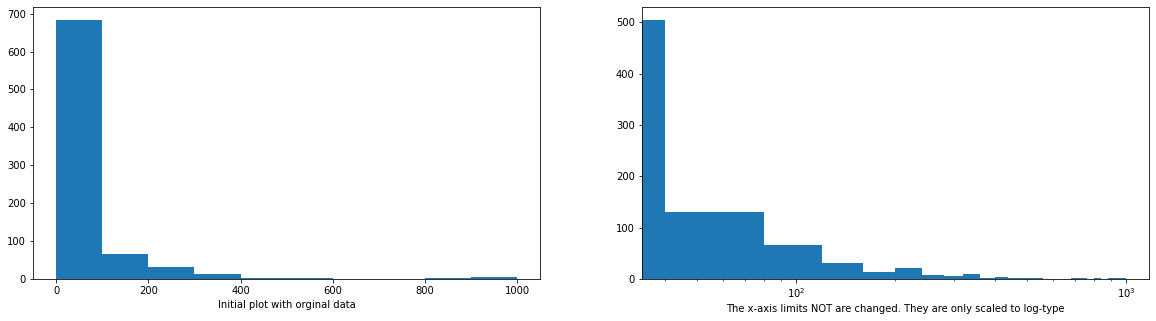

In [13]:
plt.figure(figsize=[20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
plt.xlabel('Initial plot with orginal data');

# HISTOGRAM ON RIGHT
plt.subplot(1, 2, 2)
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);
# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log');
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type');

# Notice two things about the right histogram of example 1 above, now.
# 1st: Even though the data is on a log scale, the bins are still linearly spaced. 
# This means that they change size from wide on the left to thin on the right, as the values increase multiplicative. 
# Matplotlib's xscale function includes a few built-in transformations: we have used the 'log' scale here.

# Secondly: the default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.


In [14]:
# Describing the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

### Scale the x-axis to log-type, and change the axis limit.

In [20]:
descriptive_data_at_log_scal = np.log10(pokemon['weight'].describe())
descriptive_data_at_log_scal

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

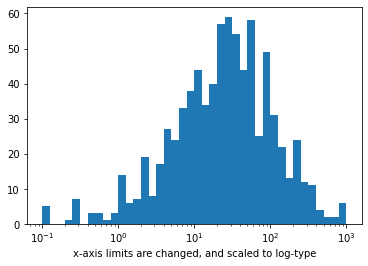

In [29]:
#  Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);
plt.xscale('log');
plt.xlabel('x-axis limits are changed, and scaled to log-type');

### Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

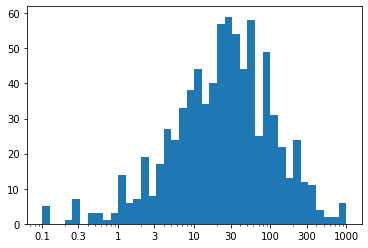

In [30]:
# Get ticks for bins between [0 - max weight] with respect to descriptive stats of the data at log10 scale
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)

# Generate the x-ticks we want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

# Convert ticks into string values, to be displayed along X-axis
labels = [f'{val}' for val in ticks]

# plot histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# scale X-axis to log type
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks=ticks, labels=labels);

### Custom scaling the given data Series, instead of using the built-in log scale

#### plotting the above data on a square-root transformation.

In [31]:
def sqrt_trans(x, inverse=False):
    """square-root transformation function."""
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2


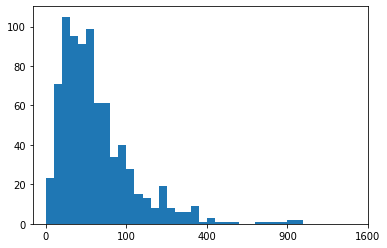

In [56]:
# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));